<a href="https://colab.research.google.com/github/proflynch/Tekbac/blob/master/Discrete_Hopfield_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Discrete Hopfield Network

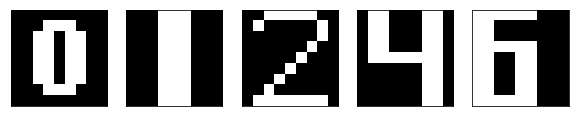

Pattern index= 1


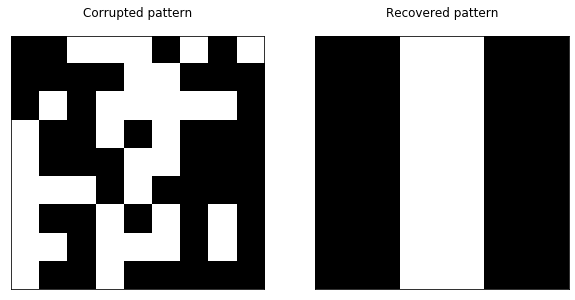

In [1]:
# Hopfield Model

import matplotlib.pyplot as plt
import numpy as np
import random


nb_patterns = 5
pattern_width = 9
pattern_height = 9
max_iterations = 81

# Initialize the patterns
X = np.zeros((nb_patterns, pattern_width * pattern_height))

X[0] = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 
 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 
 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
X[1] = [-1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1,
 -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1,
 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1]
X[2] = [-1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1,	-1, -1, -1, -1,	1, -1,	-1, -1, -1, -1,	-1, -1, -1, 1, -1,	-1, -1, -1, -1,	
 -1, -1, 1,	-1, -1,	-1, -1, -1, -1,	-1, 1, -1,	-1, -1,   -1, -1, -1, -1, 1, -1, -1, -1,	-1,   -1, -1, -1, 1, -1, -1, -1,	-1, -1, 
 -1, -1,	1, -1, -1,	-1, -1, -1, -1,	 -1, 1, 1, 1, 1, 1, 1, 1, -1]
X[3] = [-1, 1, 1, -1, -1, -1, 1, 1, -1,  -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 
 1, -1, -1,  1, 1, 1, 1, 1, 1, 1, -1,  -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,  -1, -1, -1, -1, -1, 
 -1, 1, 1, -1,  -1, -1, -1, -1, -1, -1, 1, 1, -1]
X[4] = [1, 1, 1, 1, 1, 1, -1, -1, -1,  1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1,  1, 1, 1, 1, 1, 1, -1, 
 -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1,  1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 
 -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1]

# Show the patterns
fig, ax = plt.subplots(1, nb_patterns, figsize=(10, 5))

for i in range(nb_patterns):
    ax[i].matshow(X[i].reshape((pattern_height, pattern_width)), cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    
plt.show()

W = ((np.outer(X[0],X[0])+np.outer(X[1],X[1])+np.outer(X[2],X[2])+np.outer(X[3],X[3])+np.outer(X[4],X[4]))-5*np.identity(81))/81

def hsgn(v, x):
    if v>0:
        return 1
    elif v == 0:
        return x
    else:
        return -1
        
# Create a corrupted test pattern

noiselevel = 1/3
values = list(range(nb_patterns))
patInd = random.choice(values)
Y = np.array(X[patInd])
x_test = np.array((2*(np.random.rand(81, 1).flatten() > noiselevel)-1)*Y)
x_test.flatten()
print('Pattern index=',patInd)

# Recover the original patterns
A = x_test.copy()
A.flatten()

n=np.random.permutation(81)

for _ in range(max_iterations):
    for j in range(81):
        A[n[j]]=hsgn(np.dot(W[n[j]],A), A[n[j]])


# Show corrupted and recovered patterns
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].matshow(x_test.reshape(pattern_height, pattern_width), cmap='gray')
ax[0].set_title('Corrupted pattern')
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].matshow(A.reshape(pattern_height, pattern_width), cmap='gray')
ax[1].set_title('Recovered pattern')
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()